# OpenCV Tutorial

In this tutorial, you will learn the basics of OpenCV needed for this hackathon

## Objectives

*   Import images and display them
*   Play and download videos from youtube 
*   Extract video information and individual frames




## Import Python Modules

In [1]:
import cv2
import numpy as np
from urllib.request import urlopen
import matplotlib.pyplot as plt
from io import BytesIO
import tempfile
import time


from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

In [2]:
def display_image(image):
    fig = plt.figure(figsize=(20, 15))
    plt.grid(False)
    plt.imshow(image)

In [3]:
def download_and_resize_image(url, new_width=256, new_height=256,
                              display=False):
    _, filename = tempfile.mkstemp(suffix=".jpg")
    response = urlopen(url)
    image_data = response.read()
    image_data = BytesIO(image_data)
    pil_image = Image.open(image_data)
    pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
    pil_image_rgb = pil_image.convert("RGB")
    pil_image_rgb.save(filename, format="JPEG", quality=90)
    print("Image downloaded to %s." % filename)
    if display:
        display_image(pil_image)
    return filename


Image downloaded to /tmp/tmpe024n5iz.jpg.


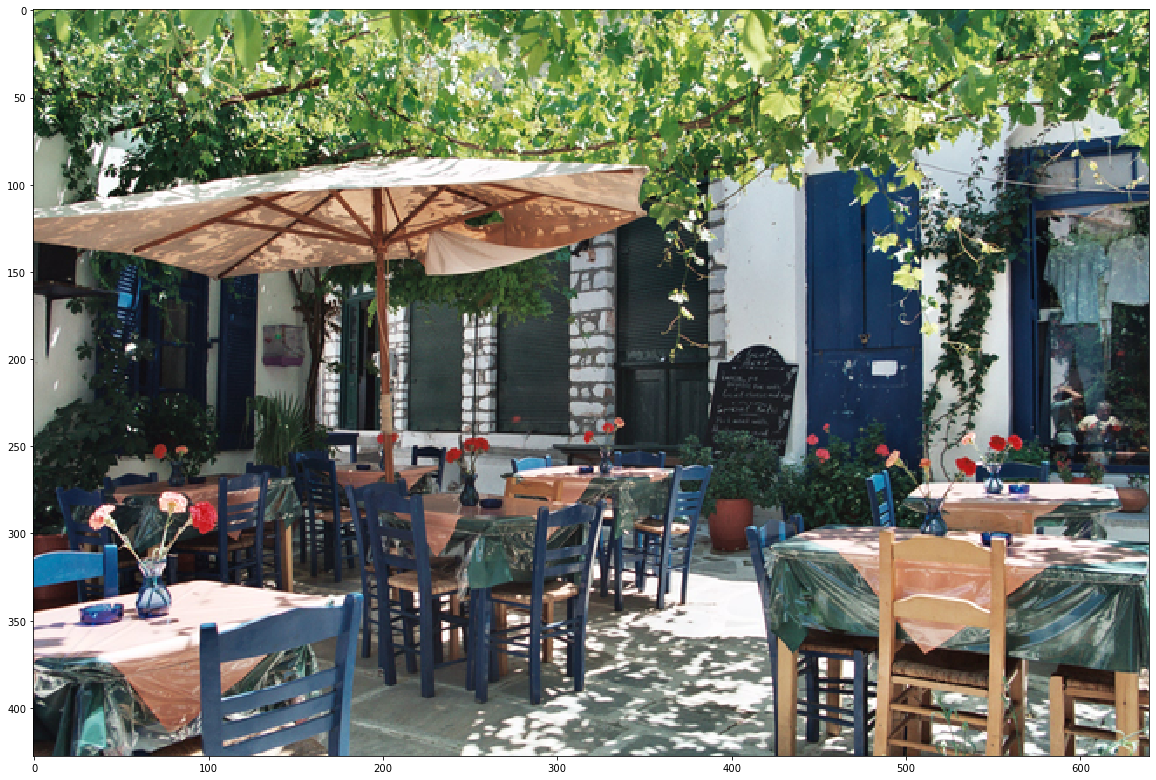

In [4]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/6/60/Naxos_Taverna.jpg"  #@param
downloaded_image_path = download_and_resize_image(image_url, 640, 428, True)

### Image Procesing and Display

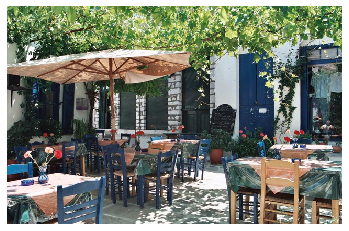

In [5]:
image = cv2.imread(downloaded_image_path, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(width,height) = gray.shape
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image,extent=[width,height,0,1],aspect='auto')
plt.grid(False)
plt.axis('off')
plt.show()

## Play and Download videos from youtube in mp4 format

Example: https://www.youtube.com/watch?v=Zbl3n2qQ-iQ

```
from IPython.lib.display import YouTubeVideo
YouTubeVideo('Zbl3n2qQ-iQ')
```

### Download

`youtube-dl -o '%(title)s.%(ext)s' Zbl3n2qQ-iQ --restrict-filenames -f mp4`



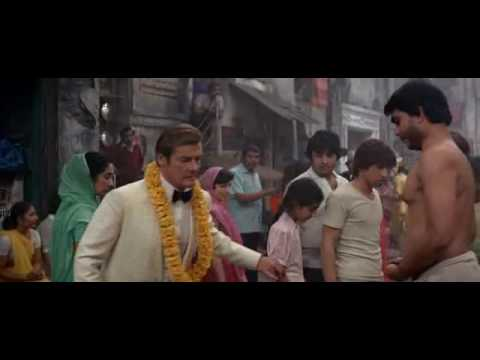

In [6]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('Zbl3n2qQ-iQ')

### Display Video Metadata

In [7]:
cap = cv2.VideoCapture('JAMES_BOND_IN_ACTION_007_IN_INDIA.mp4')
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = cap.get(cv2.CAP_PROP_FPS)

print("Width x Height = %d x %d, Frames = %d, Frames/second = %d\n"%(width,height,total_frames,fps))

Width x Height = 640 x 272, Frames = 5887, Frames/second = 25



### Extract frames, convert color and display 

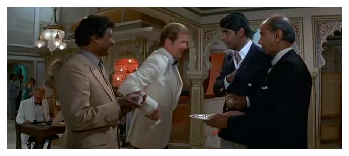

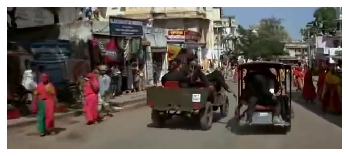

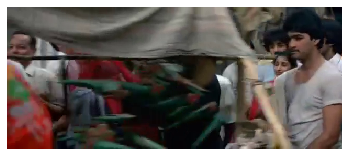

In [9]:
cap = cv2.VideoCapture('JAMES_BOND_IN_ACTION_007_IN_INDIA.mp4')
for i in range(1,total_frames,2000):
    cap.set(cv2.CAP_PROP_POS_FRAMES,i)
    ret,frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame)
    plt.grid(False)
    plt.axis('off')
    plt.show()